In [ ]:
#################################
###   VANILLA OPTION PRICER   ###
#################################

import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

def vanilla_option_price(S, K, T, r, sigma, option_type="call"):
    """
    Calculates the price of a vanilla option using the Black-Scholes model.
    """
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    if option_type == "call":
        price = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    else:
        price = K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

    return price

def plot_vanilla_option_payoff_and_value(S, K, T, r, sigma, option_type):
    """
    Plots the payoff and the current value of a vanilla option, and calculates time value.
    """
    prices = np.linspace(0.5 * K, 1.5 * K, 400)
    payoffs = np.maximum(prices - K, 0) if option_type == "call" else np.maximum(K - prices, 0)
    current_values = [vanilla_option_price(S_i, K, T, r, sigma, option_type) for S_i in prices]

    # Calculate intrinsic value and current option price
    intrinsic_value = payoffs[np.abs(prices - S).argmin()]
    current_price = current_values[np.abs(prices - S).argmin()]

    # Calculate time value
    time_value = current_price - intrinsic_value

    plt.figure(figsize=(12, 6))

    # Payoff Graph
    plt.subplot(1, 2, 1)
    plt.plot(prices, payoffs, 'g-', label=f"Payoff\nS={S}, K={K}")
    plt.axvline(x=K, color='blue', linestyle='--', label=f'Strike Price (K={K})')
    plt.axvline(x=S, color='red', linestyle='--', label=f'Spot Price (S={S})')
    plt.axhline(y=intrinsic_value, color='orange', linestyle=':', label=f'Intrinsic Value: {intrinsic_value:.2f}')
    plt.title("Payoff")
    plt.xlabel("Underlying Asset Price")
    plt.ylabel("Payoff")
    plt.legend()
    plt.grid(True)

    # Current Value Graph
    plt.subplot(1, 2, 2)
    plt.plot(prices, current_values, 'g-', label=f"Current Option Value\nS={S}, K={K}")
    plt.axvline(x=K, color='blue', linestyle='--', label=f'Strike Price (K={K})')
    plt.axvline(x=S, color='red', linestyle='--', label=f'Spot Price (S={S})')
    plt.axhline(y=current_price, color='purple', linestyle=':', label=f'Current Option Price: {current_price:.2f}')
    plt.title("Current Value of Vanilla Option")
    plt.xlabel("Underlying Asset Price")
    plt.ylabel("Option Value")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Output with two decimals
    print(f"Current {option_type} option price: {current_price:.2f}")
    print(f"Intrinsic value: {intrinsic_value:.2f}")
    print(f"Time value: {time_value:.2f}")  # Print the calculated time value

# User inputs
S = float(input("Enter the current price of the underlying asset (S): "))
K = float(input("Enter the strike price of the option (K): "))
T = float(input("Enter the time to maturity in years (T): "))
r = float(input("Enter the annual risk-free interest rate (r): "))
sigma = float(input("Enter the volatility (sigma): "))
option_type = input("Enter the type of option ('call' or 'put'): ").lower()

# Plot the payoff and current value
plot_vanilla_option_payoff_and_value(S, K, T, r, sigma, option_type)


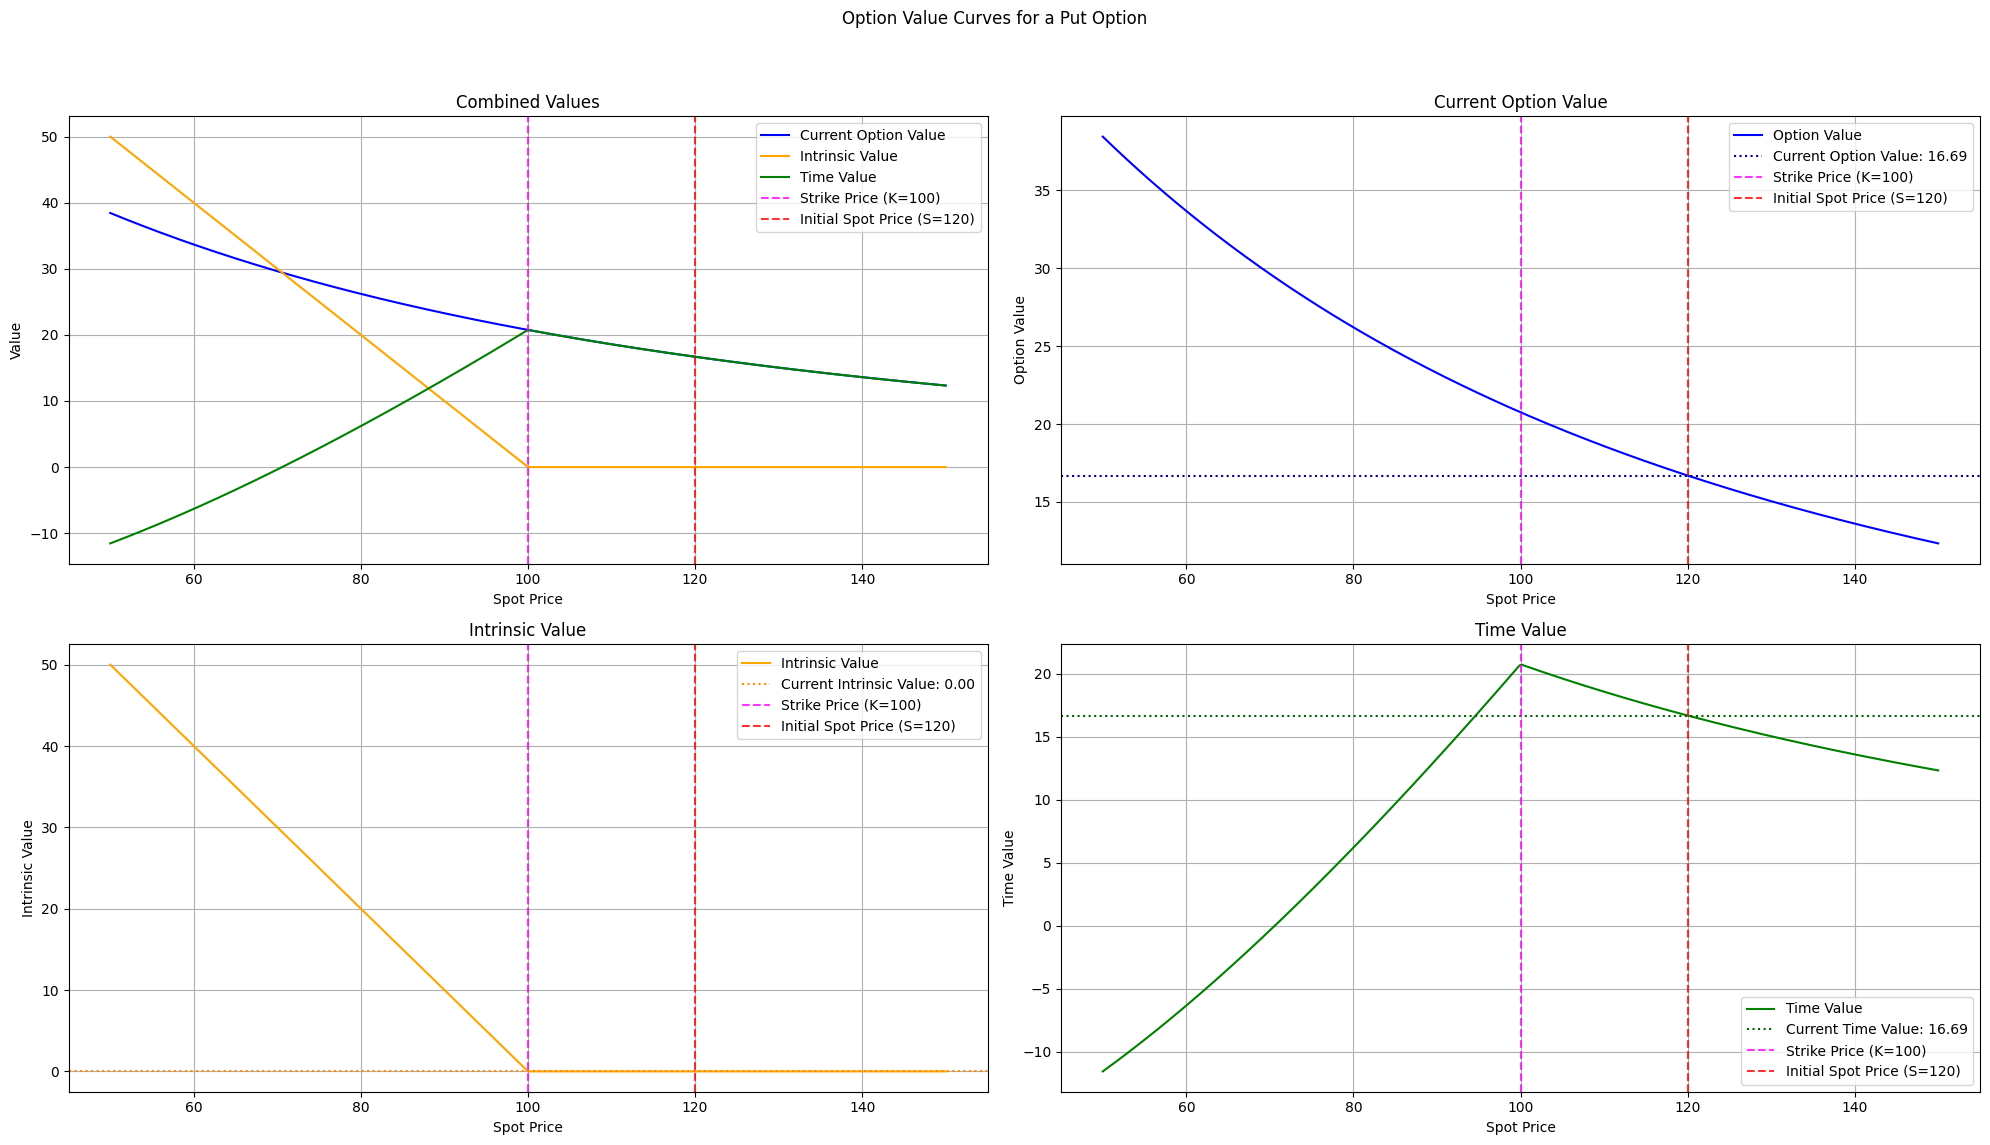

Current Option Value: 16.69
Intrinsic Option Value: 0.00
Time Option Value: 16.69


In [ ]:
###################################
###   VANILLA OPTION PRICER 2   ###
###################################
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def vanilla_option_values(S,K,T,r,sigma,option_type):

    d1 = (math.log(S/K)+(r+0.5*sigma**2)*T)/(math.sqrt(T)*sigma)
    d2 = d1 - math.sqrt(T)*sigma

    if option_type == "call":
        current_option_value = S*norm.cdf(d1)-K*math.exp(-r*T)* norm.cdf(d2)
        intrinsic_option_value= np.maximum(S-K,0)

    elif option_type == "put":
        current_option_value = K*math.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)
        intrinsic_option_value= np.maximum(K-S,0)

    time_option_value = current_option_value - intrinsic_option_value

    return current_option_value, intrinsic_option_value, time_option_value




def plot_results(S, K, T, r, sigma, option_type):
    spot_prices_set = np.linspace(0.5 * K, 1.5 * K, 400)
    results = []

    # Calculez les valeurs pour le spot price initial S
    current_option_value_init, intrinsic_option_value_init, time_option_value_init = vanilla_option_values(S, K, T, r, sigma, option_type)

    for S_i in spot_prices_set:
        current_option_value, intrinsic_option_value, time_option_value = vanilla_option_values(S_i, K, T, r, sigma, option_type)
        results.append({'Current Value': current_option_value, 'Intrinsic Value': intrinsic_option_value, 'Time Value': time_option_value})

    results = pd.DataFrame(results)
    results['Spot'] = spot_prices_set

    # Création des sous-graphiques
    fig, axs = plt.subplots(2, 2, figsize=(20, 12)) # 2 lignes, 2 colonnes
    fig.suptitle(f'Option Value Curves for a {option_type.capitalize()} Option')

    # Graphique combiné
    axs[0, 0].plot(results['Spot'], results['Current Value'], label='Current Option Value', color='blue')
    axs[0, 0].plot(results['Spot'], results['Intrinsic Value'], label='Intrinsic Value', color='orange')
    axs[0, 0].plot(results['Spot'], results['Time Value'], label='Time Value', color='green')
    axs[0, 0].set_title('Combined Values')
    axs[0, 0].axvline(x=K, color='magenta', linestyle='--', label=f'Strike Price (K={K})', alpha=0.8)
    axs[0, 0].axvline(x=S, color='red', linestyle='--', label=f'Initial Spot Price (S={S})', alpha=0.8)
    axs[0, 0].set(xlabel='Spot Price', ylabel='Value')
    axs[0, 0].grid(True)
    axs[0, 0].legend()

    # Valeur courante
    axs[0, 1].plot(results['Spot'], results['Current Value'], color='blue', label='Option Value')
    axs[0, 1].axhline(y=current_option_value_init, color='darkblue', linestyle=':', label=f'Current Option Value: {current_option_value_init:.2f}')
    axs[0, 1].set_title('Current Option Value')
    axs[0, 1].axvline(x=K, color='magenta', linestyle='--', label=f'Strike Price (K={K})', alpha=0.8)
    axs[0, 1].axvline(x=S, color='red', linestyle='--', label=f'Initial Spot Price (S={S})', alpha=0.8)
    axs[0, 1].legend()
    axs[0, 1].set(xlabel='Spot Price', ylabel='Option Value')
    axs[0, 1].grid(True)

    # Valeur intrinsèque
    axs[1, 0].plot(results['Spot'], results['Intrinsic Value'], color='orange', label='Intrinsic Value')
    axs[1, 0].axhline(y=intrinsic_option_value_init, color='darkorange', linestyle=':', label=f'Current Intrinsic Value: {intrinsic_option_value_init:.2f}')
    axs[1, 0].set_title('Intrinsic Value')
    axs[1, 0].axvline(x=K, color='magenta', linestyle='--', label=f'Strike Price (K={K})', alpha=0.8)
    axs[1, 0].axvline(x=S, color='red', linestyle='--', label=f'Initial Spot Price (S={S})', alpha=0.8)
    axs[1, 0].legend()
    axs[1, 0].set(xlabel='Spot Price', ylabel='Intrinsic Value')
    axs[1, 0].grid(True)

    # Valeur temporelle
    axs[1, 1].plot(results['Spot'], results['Time Value'], color='green', label='Time Value')
    axs[1, 1].axhline(y=time_option_value_init, color='darkgreen', linestyle=':', label=f'Current Time Value: {time_option_value_init:.2f}')
    axs[1, 1].set_title('Time Value')
    axs[1, 1].axvline(x=K, color='magenta', linestyle='--', label=f'Strike Price (K={K})', alpha=0.8)
    axs[1, 1].axvline(x=S, color='red', linestyle='--', label=f'Initial Spot Price (S={S})', alpha=0.8)
    axs[1, 1].legend()
    axs[1, 1].set(xlabel='Spot Price', ylabel='Time Value')
    axs[1, 1].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    return current_option_value_init, intrinsic_option_value_init, time_option_value_init

# Parameters
S = 120
K = 100
T = 5
r = 0.05
sigma = 0.4
option_type = "put"

current_option_value, intrinsic_option_value, time_option_value = plot_results(S, K, T, r, sigma, option_type)
print(f"Current Option Value: {current_option_value:.2f}")
print(f"Intrinsic Option Value: {intrinsic_option_value:.2f}")
print(f"Time Option Value: {time_option_value:.2f}")


In [ ]:
################################
###   VANILLA OPTION DELTA   ###
################################

import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def vanilla_option_values(S, K, T, r, sigma, option_type):
    d1 = (math.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    if option_type == "call":
        current_option_value = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
        intrinsic_option_value = np.maximum(S - K, 0)
    elif option_type == "put":
        current_option_value = K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
        intrinsic_option_value = np.maximum(K - S, 0)

    time_option_value = current_option_value - intrinsic_option_value

    return current_option_value, intrinsic_option_value, time_option_value

def calculate_delta(S, K, T, r, sigma, option_type):
    d1 = (math.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    if option_type == "call":
        delta = norm.cdf(d1)
    elif option_type == "put":
        delta = norm.cdf(d1) - 1
    return delta

def plot_delta(S, K, T, r, sigma, option_type):
    spot_prices_set = np.linspace(0.5 * K, 1.5 * K, 400)
    deltas = []

    current_spot_delta = calculate_delta(S, K, T, r, sigma, option_type)

    for S_i in spot_prices_set:
        delta = calculate_delta(S_i, K, T, r, sigma, option_type)
        deltas.append(delta)

    plt.figure(figsize=(10, 6))
    plt.plot(spot_prices_set, deltas, label='Delta', color='purple')
    plt.axhline(y=current_spot_delta, color='blue', linestyle='--', label=f'Current Delta: {current_spot_delta:.2f}')
    plt.axvline(x=K, color='magenta', linestyle='--', label=f'Strike Price (K={K})')
    plt.axvline(x=S, color='red', linestyle='--', label=f'Initial Spot Price (S={S})')
    plt.title(f'Delta for {option_type.capitalize()} Option')
    plt.xlabel('Spot Price')
    plt.ylabel('Delta')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Interprétation du delta
    if option_type == "call":
        print("Le delta mesure la sensibilité du prix de l'option par rapport au prix de l'actif sous-jacent.")
        print("Un delta positif indique que la valeur de l'option augmente lorsque le prix de l'actif sous-jacent augmente.")
    elif option_type == "put":
        print("Le delta mesure la sensibilité du prix de l'option par rapport au prix de l'actif sous-jacent.")
        print("Un delta négatif indique que la valeur de l'option augmente lorsque le prix de l'actif sous-jacent diminue.")

    # Instructions pour être delta neutre
    if current_spot_delta > 0:
        choice = input("Souhaitez-vous vendre l'actif sous-jacent physique (P) ou prendre une position courte (C) ? ").upper()
        if choice == "P":
            quantity_to_sell = current_spot_delta * 100  # Assuming 1 option contract equals 100 shares
            print(f"Pour devenir delta neutre (vendre le sous-jacent), vous devriez vendre {quantity_to_sell:.2f} actions.")
            print("Cela signifie que vous vendez une partie ou la totalité de votre position dans l'actif sous-jacent,")
            print("afin de compenser la sensibilité positive de l'option aux mouvements du prix de l'actif.")
        elif choice == "C":
            print("Pour prendre une position courte (vendre sans posséder), vous pouvez vendre l'actif sous-jacent à découvert.")
        else:
            print("Choix invalide. Veuillez entrer 'P' pour vendre l'actif sous-jacent physique ou 'C' pour prendre une position courte.")
    elif current_spot_delta < 0:
        choice = input("Souhaitez-vous acheter l'actif sous-jacent physique (A) ou prendre une position longue (L) ? ").upper()
        if choice == "A":
            quantity_to_buy = -current_spot_delta * 100  # Assuming 1 option contract equals 100 shares
            print(f"Pour devenir delta neutre (acheter le sous-jacent), vous devriez acheter {quantity_to_buy:.2f} actions.")
            print("Cela signifie que vous achetez une partie ou la totalité de votre position dans l'actif sous-jacent,")
            print("afin de compenser la sensibilité négative de l'option aux mouvements du prix de l'actif.")
        elif choice == "L":
            print("Pour prendre une position longue (acheter), vous pouvez acheter l'actif sous-jacent.")
        else:
            print("Choix invalide. Veuillez entrer 'A' pour acheter l'actif sous-jacent physique ou 'L' pour prendre une position longue.")

def get_input_params():
    S = float(input("Entrez le spot price (S) : "))
    K = float(input("Entrez le strike price (K) : "))
    T = float(input("Entrez le temps jusqu'à l'expiration en années (T) : "))
    r = float(input("Entrez le taux d'intérêt (r) : "))
    sigma = float(input("Entrez la volatilité (sigma) : "))
    option_type = input("Entrez le type d'option (call ou put) : ").lower()

    return S, K, T, r, sigma, option_type

# Paramètres
S, K, T, r, sigma, option_type = get_input_params()

current_option_value, intrinsic_option_value, time_option_value = vanilla_option_values(S, K, T, r, sigma, option_type)
print(f"Current Option Value: {current_option_value:.2f}")
print(f"Intrinsic Option Value: {intrinsic_option_value:.2f}")
print(f"Time Option Value: {time_option_value:.2f}")

# Utilisation de la fonction pour tracer le delta
plot_delta(S, K, T, r, sigma, option_type)
